## Libraries for Time-Series Analysis

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

## Tesla Stock Analysis

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667
2017-11-28,21.333332,20.927999,21.090668,21.170000,74242500.0,21.170000
2017-11-29,21.200001,20.082001,21.153334,20.502666,131511000.0,20.502666
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000
...,...,...,...,...,...,...
2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998
2022-11-17,186.160004,180.899994,183.960007,183.169998,64336000.0,183.169998
2022-11-18,185.190002,176.550003,185.050003,180.190002,75904900.0,180.190002


### Simple Moving Average

<AxesSubplot:xlabel='Date'>

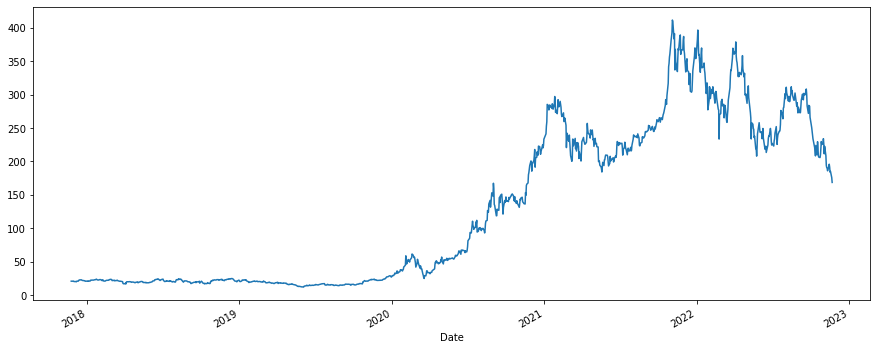

In [4]:
df_tesla['Open'].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

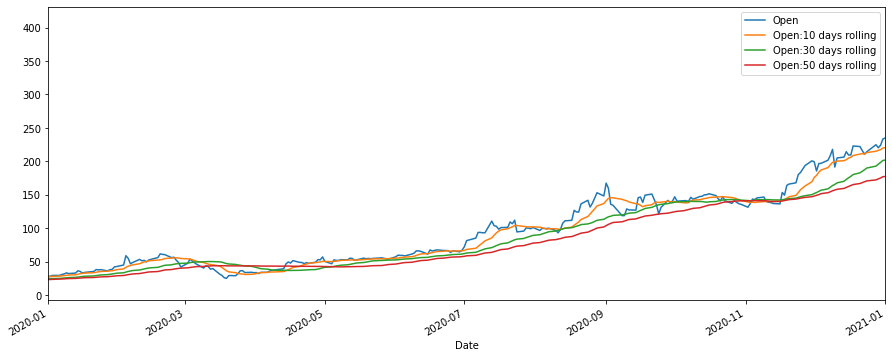

In [10]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()
df_tesla[['Open', 'Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))

### Expanding: Cumulative Moving Average

<AxesSubplot:xlabel='Date'>

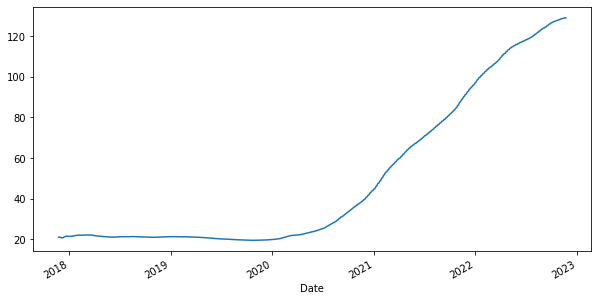

In [11]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

#### EWMA: Exponential Weighted Moving Average

In [12]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

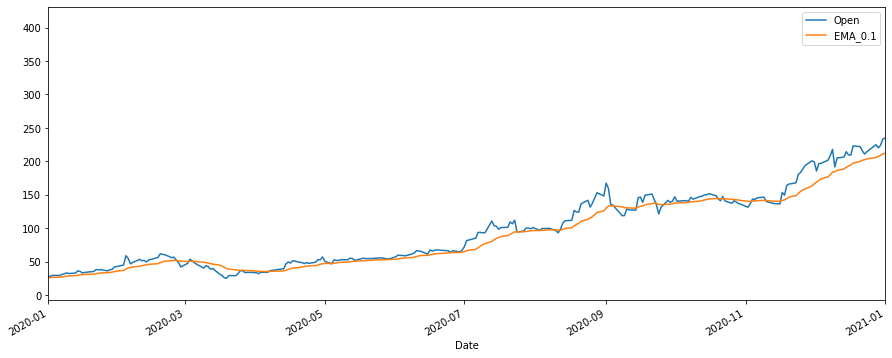

In [13]:
df_tesla[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(15,6))

<AxesSubplot:xlabel='Date'>

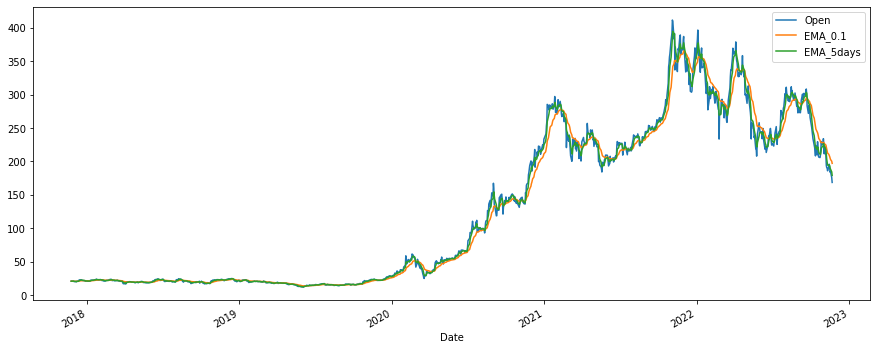

In [16]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()
df_tesla[['Open', 'EMA_0.1', 'EMA_5days']].plot(figsize=(15,6))